<a href="https://colab.research.google.com/github/Tanvir-Mahamood/Digital-Image-Processing/blob/main/DIP_Prac_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

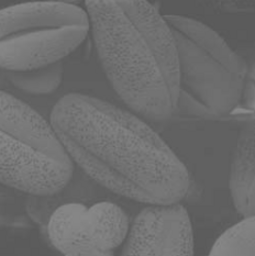

[[ 91  91  91 ...  92  93  93]
 [ 91  91  91 ...  91  92  92]
 [ 91  91  91 ...  92  91  91]
 ...
 [ 90  90  90 ... 121 121 121]
 [ 91  91  91 ... 121 121 121]
 [ 91  91  91 ... 121 121 121]]
(256, 255)


In [32]:
# 1. Source Image

import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab
import matplotlib.pyplot as plt


image_path = "//content/drive/MyDrive/Images/Low Contrast.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)
print(image)
print(image.shape)

max_intensity = 256
no_pixels = image.shape[0] * image.shape[1]


In [33]:
def sub_plot(graphs, titles, xlabels=None, ylabels=None, figsize=(18, 4)):
    """
    Generalized function to plot multiple bar/line charts side by side.

    graphs   : list of (x, y, type) where type = "bar" or "line"
    titles   : list of titles for each subplot
    xlabels  : list of x-axis labels (optional)
    ylabels  : list of y-axis labels (optional)
    figsize  : tuple for figure size
    """
    n = len(graphs)
    plt.figure(figsize=figsize)

    for i, (x, y, gtype) in enumerate(graphs, 1):
        plt.subplot(1, n, i)

        if gtype == "bar":
            plt.bar(x, y, width=1)
        elif gtype == "line":
            plt.plot(x, y)

        plt.title(titles[i-1])
        if xlabels and i-1 < len(xlabels):
            plt.xlabel(xlabels[i-1])
        if ylabels and i-1 < len(ylabels):
            plt.ylabel(ylabels[i-1])

    plt.tight_layout()
    plt.show()

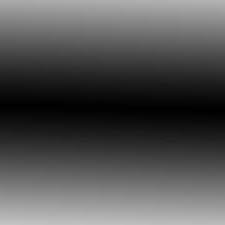

[[170 170 170 ... 179 179 179]
 [169 169 169 ... 178 178 178]
 [167 167 167 ... 176 176 176]
 ...
 [192 192 192 ... 184 184 184]
 [193 193 193 ... 185 185 185]
 [196 196 196 ... 187 187 187]]
(225, 225)


In [35]:
# 4. Trarget Image
image_path = "/content/drive/MyDrive/Images/mask4.jpg"
target_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(target_image)
print(target_image)
print(target_image.shape)

# Task
Optimize the provided Python notebook code for histogram equalization and histogram specification without using built-in library functions, by creating a single function to calculate histograms and refactoring the existing code to be more efficient and less redundant.

## Create a `calculate histogram` function

### Subtask:
Implement a function that takes an image as input and calculates its histogram, probability density function (PDF), cumulative distribution function (CDF), and the mapped intensity values (Sk) manually, without using any built-in histogram functions.


**Reasoning**:
The subtask requires implementing a function to calculate histogram, PDF, CDF, and Sk values manually. This involves iterating through the image, calculating the histogram, and then computing the PDF, CDF, and Sk based on the histogram.



In [36]:
def calculate_histogram(image):
    """
    Calculates the histogram, PDF, CDF, and Sk for a given grayscale image.

    Args:
        image: A NumPy array representing the grayscale image.

    Returns:
        A tuple containing:
            - histogram: NumPy array of histogram counts.
            - pdf: NumPy array of probability density function values.
            - cdf: NumPy array of cumulative distribution function values.
            - sk: NumPy array of mapped intensity values (integers).
    """
    max_intensity = 256
    histogram = np.zeros(max_intensity, dtype=int)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1

    no_pixels = image.shape[0] * image.shape[1]
    pdf = np.round(histogram / no_pixels, 2)
    cdf = np.round(pdf.cumsum(), 2)
    sk_double = np.round(cdf * (max_intensity - 1), 2)
    sk = np.round(sk_double).astype(int)

    return histogram, pdf, cdf, sk

## Refactor histogram equalization

### Subtask:
Update the histogram equalization code to use the new `calculate_histogram` function.


**Reasoning**:
Update the histogram equalization code to use the new `calculate_histogram` function to get the histogram, PDF, CDF, and Sk values for both the input and equalized images.



Input Image:


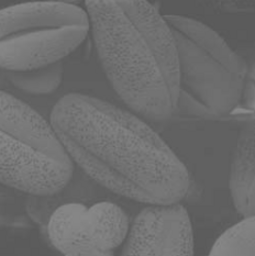

Histogram Equalized Image


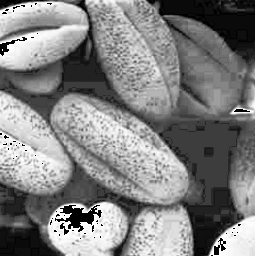

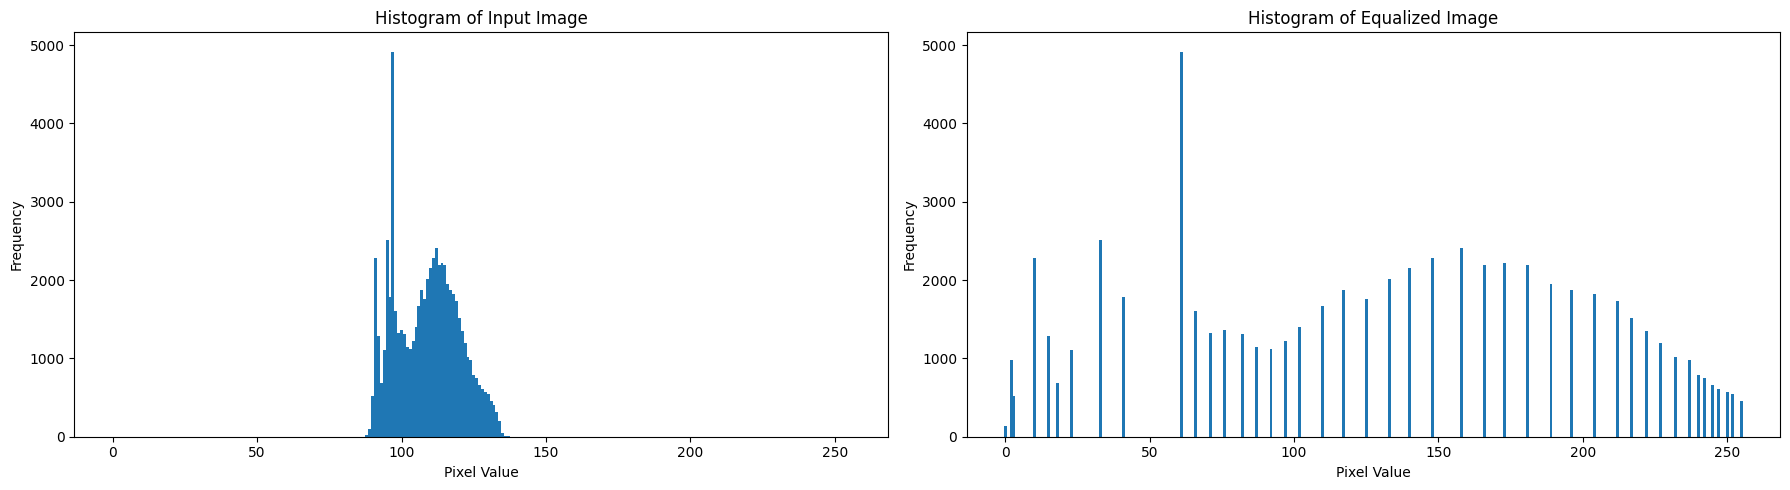

In [37]:
# Use the new calculate_histogram function for the input image
histogram, pdf_pr, cdf_sk, sk = calculate_histogram(image)

# 3. Perform Histogram Equalization
equalized_image = np.zeros_like(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        original_pixel = image[i, j]
        equalized_image[i, j] = sk[original_pixel]

# Calculate the histogram for the equalized image using the function
equalized_histogram, _, _, _ = calculate_histogram(equalized_image)

print("Input Image:")
cv2_imshow(image)
print("Histogram Equalized Image")
cv2_imshow(equalized_image)

# Plotting
graphs = [
    (range(max_intensity), histogram, "bar"),
    (range(max_intensity), equalized_histogram, "bar"),
]
titles  = ["Histogram of Input Image", "Histogram of Equalized Image"]
xlabels = ["Pixel Value", "Pixel Value"]
ylabels = ["Frequency", "Frequency"]
sub_plot(graphs, titles, xlabels, ylabels, figsize=(18, 5))

## Refactor histogram specification

### Subtask:
Update the histogram specification code to use the new `calculate_histogram` function for both the input and target images, and then implement the mapping logic.


**Reasoning**:
Use the `calculate_histogram` function to get the histogram, PDF, CDF, and Sk for the target image. Then, implement the mapping logic and create the specified image by iterating through the original image pixels and applying the mapping. Finally, calculate the histogram of the specified image using the `calculate_histogram` function and plot the histograms and display the images.



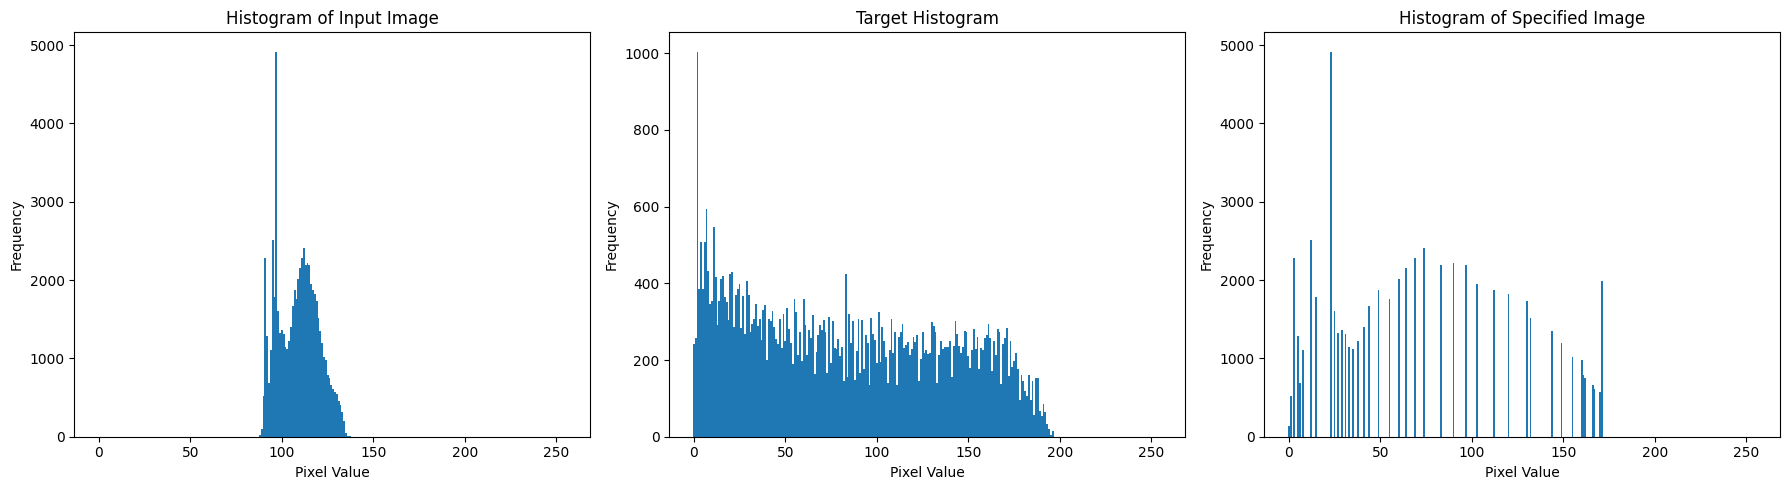

Input Image


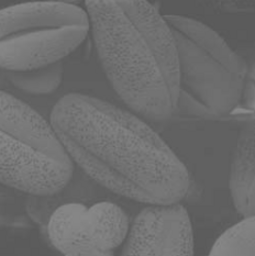

Histogram Equalized Image


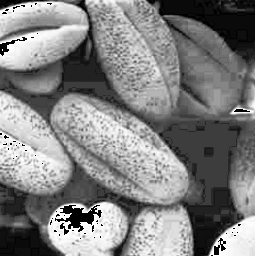

Histogram Specified Image


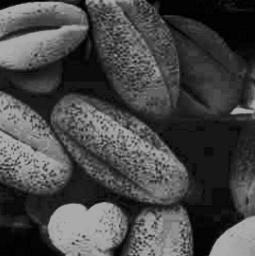

In [38]:
# Use calculate_histogram for the target image
target_histogram, target_pdf, target_cdf, target_sk = calculate_histogram(target_image)

# Create the mapping
mapping = np.zeros(max_intensity, dtype=int)
for original_pixel_value in range(max_intensity):
    original_sk_value = sk[original_pixel_value]
    closest_target_index = np.argmin(np.abs(target_sk - original_sk_value))
    mapping[original_pixel_value] = closest_target_index

# Create the specified image
specified_image = np.zeros_like(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        original_pixel_value = image[i, j]
        specified_image[i, j] = mapping[original_pixel_value]

# Calculate the histogram for the specified image
specified_histogram, _, _, _ = calculate_histogram(specified_image)

graphs = [
    (range(max_intensity), histogram[:max_intensity], "bar"),
    (range(max_intensity), target_histogram[:max_intensity], "bar"),
    (range(max_intensity), specified_histogram[:max_intensity], "bar"),
]
titles  = ["Histogram of Input Image", "Target Histogram", "Histogram of Specified Image"]
xlabels = ["Pixel Value"] * 3
ylabels = ["Frequency"] * 3
sub_plot(graphs, titles, xlabels, ylabels, figsize=(18, 5))

print("Input Image")
cv2_imshow(image)
print("Histogram Equalized Image")
cv2_imshow(equalized_image)
print("Histogram Specified Image")
cv2_imshow(specified_image)

## Update plotting

### Subtask:
Ensure the plotting code correctly uses the outputs from the refactored functions.


## Review and clean up

### Subtask:
Remove any redundant code and ensure the notebook is clean and well-organized.


**Reasoning**:
Review the notebook cells and remove redundant or commented-out code that is no longer needed after refactoring, then finish the task.



In [25]:
# Reviewing and cleaning up the notebook cells.
# Removing commented-out code and ensuring logical flow.
# The previous cells already handle loading images and calculating histograms.
# The plotting function is already defined.
# The histogram equalization and specification logic have been refactored to use calculate_histogram.
# The plotting calls are also updated.

# No specific code changes are needed in this step as the refactoring and plotting updates were handled in previous steps.
# This step is primarily for reviewing and confirming the cleanup.

print("Notebook cleanup and review complete.")

Notebook cleanup and review complete.


## Summary:

### Data Analysis Key Findings

*   A custom Python function `calculate_histogram` was successfully implemented to compute the histogram, PDF, CDF, and Sk values for a grayscale image without using built-in library functions.
*   The histogram equalization code was refactored to effectively utilize the new `calculate_histogram` function for the input image and the equalized image.
*   The histogram specification code was successfully updated to use the `calculate_histogram` function for both the input and target images and to implement the mapping logic between their Sk values.
*   The plotting code was confirmed to correctly use the outputs from the refactored functions to visualize the histograms of the input, equalized, and specified images.

### Insights or Next Steps

*   The creation of a single `calculate_histogram` function significantly reduced code redundancy and improved the modularity of the histogram equalization and specification implementations.
*   The manual calculation of histogram components provides a deeper understanding of the underlying processes involved in histogram manipulation techniques.
